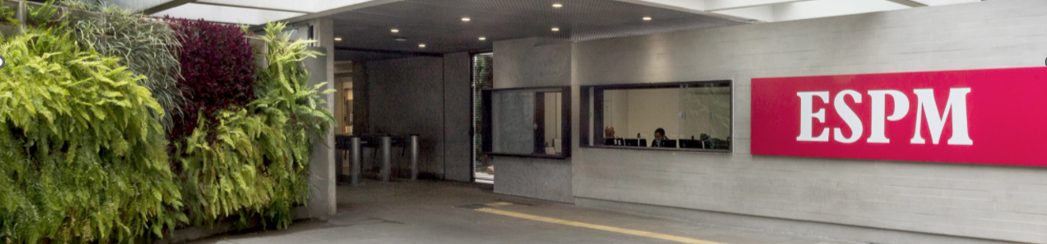

## Projeto - Séries de tempo

In [1]:
!pip install ephem


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Pacote para acessar os dados do Yahoo Finance
import yfinance as yahooFinance

# Pacote para tratamento de dados tabulares
import pandas as pd
# Pacote com funções e recursos vetorizados
import numpy as np

# Funções de data-hora
from datetime import datetime
from datetime import timedelta
from datetime import date

# O pacote ephem ajuda com fenômenos astrológicos como equinócio e lua cheia
import ephem

# O plotly é um Pacote gráfico de fácil uso e bem popular
import plotly.express as px

# opção para visualizar os gráficos no browser
import plotly.io as pio
pio.renderers.default = "browser"
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'browser'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

1) Baixe dados de fechamento ajustado de todos os dias disponíveis de 2000 a 2022 do ticker da Petrobrás e da Vale utilizando o Yahoo Finance.

In [19]:
ativos = ['PETR4.SA', 'VALE3.SA']

df = yahooFinance.download(ativos,  start='2000-01-01', end='2022-12-31')

df = df['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [20]:
print(df.isna().sum())

PETR4.SA    0
VALE3.SA    0
dtype: int64


In [21]:
df

,PETR4.SA,VALE3.SA
Date,,
2000-01-03,1.506321,1.616371
2000-01-04,1.422993,1.577886
2000-01-05,1.408635,1.577886
2000-01-06,1.403763,1.577886
2000-01-07,1.410173,1.635613
...,...,...
2022-12-23,20.212732,81.991486
2022-12-26,20.067896,82.741875
2022-12-27,20.204685,84.717575


2) Calcule os retornos normalizados dividindo o valor do ativo pelo seu valor na data inicial da análise. Faça como fizemos em aula, utilizando o método ```.iloc[0]``` para observar o valor inicial. Faça um gráfico dos retornos normalizados. Qual ativo demonstrou melhor retorno no período?

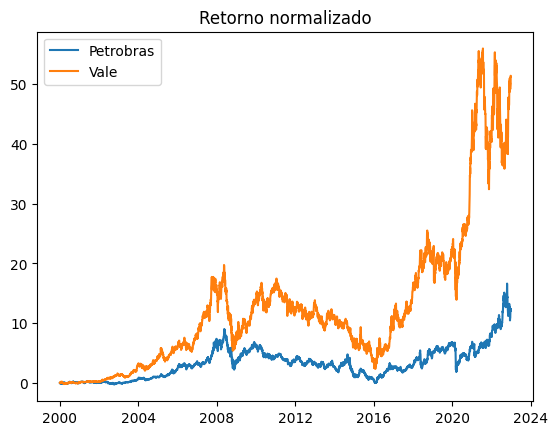

In [23]:
import matplotlib.pyplot as plt

df_normalizado = (df/ df.iloc[0] - 1)

plt.plot(df_normalizado['PETR4.SA'], label = 'Petrobras')
plt.plot(df_normalizado['VALE3.SA'], label = 'Vale')
plt.title('Retorno normalizado')
plt.legend()
plt.show()

3) Calcule os log-retornos dos ativos

In [24]:
df_log_retorno = np.log(df) - np.log(df.shift(1))

4) Faça um histograma dos log-retornos para cada ativo. Parecem ter distribuição Normal?

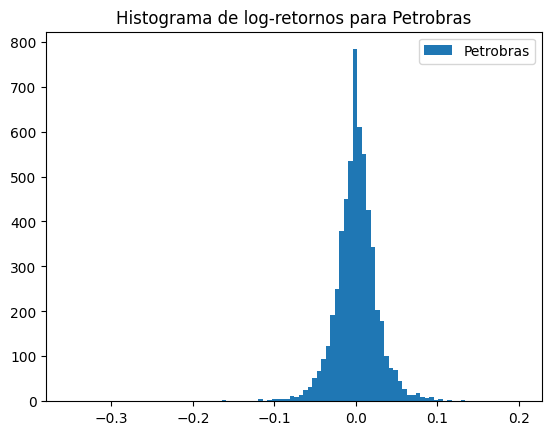

In [25]:
plt.hist(df_log_retorno["PETR4.SA"], bins=100, label="Petrobras")
plt.title("Histograma de log-retornos para Petrobras")
plt.legend()
plt.show()

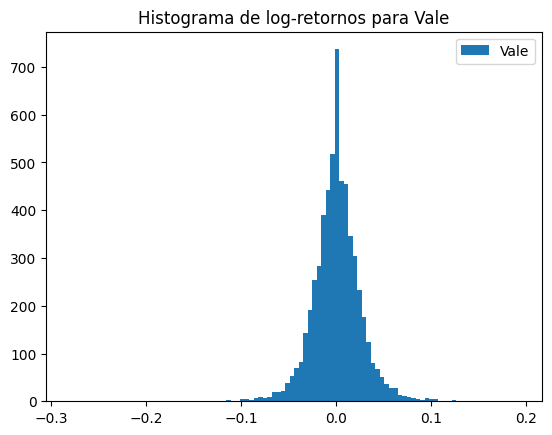

In [26]:
plt.hist(df_log_retorno['VALE3.SA'], bins=100, label="Vale")
plt.title("Histograma de log-retornos para Vale")
plt.legend()
plt.show()

5) Adicione duas colunas para cada ativo, uma contendo a média móvel de 42 dias, outra contendo a média móvel de 252 dias. Faça um gráfico para cada ativo com o valor original do ativo e as duas médias móveis calculadas.

In [28]:
df_log_retorno

,PETR4.SA,VALE3.SA
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.056908,-0.024097
2000-01-05,-0.010141,0.000000
2000-01-06,-0.003464,0.000000
2000-01-07,0.004556,0.035932
...,...,...
2022-12-23,0.046027,0.006625
2022-12-26,-0.007191,0.009110
2022-12-27,0.006793,0.023597


In [29]:
df['media_movel_42_petrobras'] = df_log_retorno['PETR4.SA'].rolling(42).mean()
df['media_movel_42_vale'] = df_log_retorno['VALE3.SA'].rolling(42).mean()

df['media_movel_252_petrobras'] = df_log_retorno['PETR4.SA'].rolling(252).mean()

df['media_movel_252_vale'] = df_log_retorno['VALE3.SA'].rolling(252).mean()

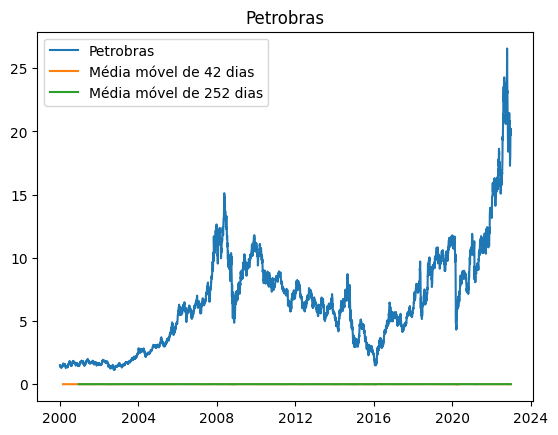

In [30]:
plt.plot(df["PETR4.SA"], label="Petrobras")
plt.plot(df['media_movel_42_petrobras'], label="Média móvel de 42 dias")
plt.plot(df['media_movel_252_petrobras'], label="Média móvel de 252 dias")
plt.title("Petrobras")
plt.legend()
plt.show()

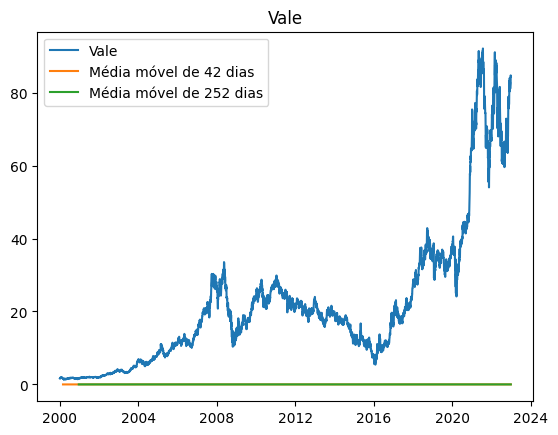

In [32]:
plt.plot(df['VALE3.SA'], label="Vale")
plt.plot(df['media_movel_42_vale'], label="Média móvel de 42 dias")
plt.plot(df['media_movel_252_vale'], label="Média móvel de 252 dias")
plt.title("Vale")
plt.legend()
plt.show()

6. Crie uma variável nova para cada ativo indicando a posição a ser tomada segundo a estratégia algoritmica. A variável deve valer 1 sempre que o valor da média curta (de 42 dias) superar a média longa (de 252 dias), e -1 caso contrário.

In [34]:
df['posicao_petrobras'] = np.where(df['media_movel_42_petrobras'] > df['media_movel_252_petrobras'], 1, -1)
df['posicao_vale'] = np.where(df['media_movel_42_vale'] > df['media_movel_252_vale'], 1, -1)

7) Considere a seguinte estratégia: sempre que a variável criada no item anterior valer 1 (a média curta é maior que a média longa), você vai assumir uma posição comprada no ativo. Sempre que a variável estiver em -1, você vai assumir uma posição 'vendida' no ativo. 

- O log-retorno da estratégia pode ser calculado multiplicando-se a variável obtida no item anterior pelo log-retorno do ativo original. Calcule o log-retorno da estratégia.

- Para realizar uma comparação mais fiel, calcule o log-retorno acumulado. Esta tarefa pode ser facilmente atingida utilizando o método ```cumsum()``` do pandas. 

- Faça um gráfico comparando o log-retorno acumulado dos ativos com o log-retorno acumulado da estratégia para cada ticker.

In [35]:
# Calcular log-retorno da estratégia
df['log_retorno_estratégia_petrobras'] = df['posicao_petrobras'] * df_log_retorno['PETR4.SA']
df['log_retorno_estratégia_vale'] = df['posicao_vale'] * df_log_retorno['VALE3.SA']

# Calcular log-retorno acumulado da estratégia
df['log_retorno_estratégia_acumulado_petrobras'] = df['log_retorno_estratégia_petrobras'].cumsum()
df['log_retorno_estratégia_acumulado_vale'] = df['log_retorno_estratégia_vale'].cumsum()




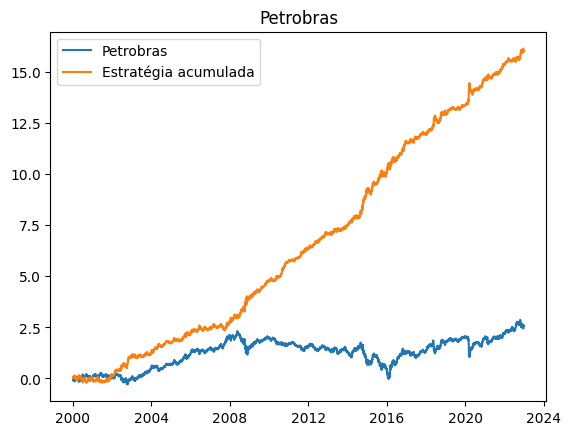

In [46]:
plt.plot(df_log_retorno['PETR4.SA'].cumsum(), label="Petrobras")
plt.plot(df['log_retorno_estratégia_acumulado_petrobras'], label="Estratégia acumulada")
plt.title("Petrobras")
plt.legend()
plt.show()

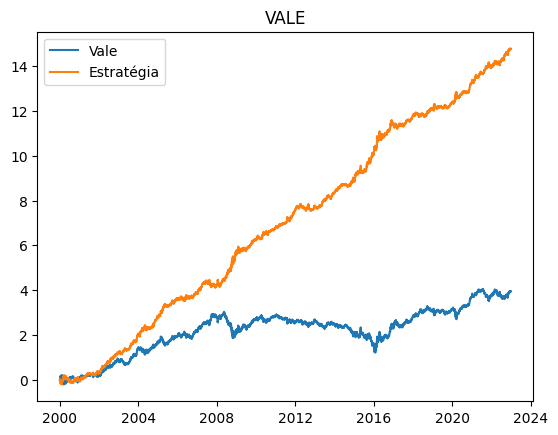

In [47]:
plt.plot(df_log_retorno['VALE3.SA'].cumsum(), label="Vale")
plt.plot(df['log_retorno_estratégia_acumulado_vale'], label="Estratégia")
plt.title("VALE")
plt.legend()
plt.show()

8. Qual se saiu melhor: o algoritmo ou a estratégia?

A estratégia